In [1]:
### FORCASTING ### USING AMTRAK DATA FILE 


In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\bharghava'

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
amtrak=pd.read_csv("C:/Users/bharghava/Downloads/Amtrak 1.csv")

In [50]:
amtrak.head()

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964


In [51]:
amtrak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      159 non-null    object 
 1   Ridership  159 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [52]:
amtrak.describe()

,Ridership
count,159.000000
mean,1822.197208
std,181.636034
min,1360.852000
25%,1698.564500
50%,1831.049000
75%,1966.957500
max,2223.349000


In [53]:
amtrak.shape

(159, 2)

In [55]:
amtrak["month_num"]=range(1,160)
amtrak.head()

,Month,Ridership,month_num
0,01/01/1991,1708.917,1
1,01/02/1991,1620.586,2
2,01/03/1991,1972.715,3
3,01/04/1991,1811.665,4
4,01/05/1991,1974.964,5


In [56]:
amtrak.tail()

,Month,Ridership,month_num
154,01/11/2003,2076.054,155
155,01/12/2003,2140.677,156
156,01/01/2004,1831.508,157
157,01/02/2004,1838.006,158
158,01/03/2004,2132.446,159


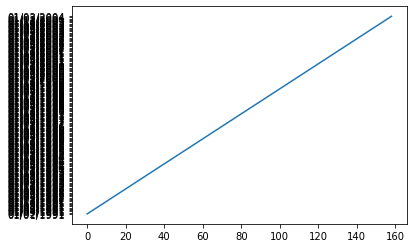

In [60]:
plt.plot(amtrak.Month)


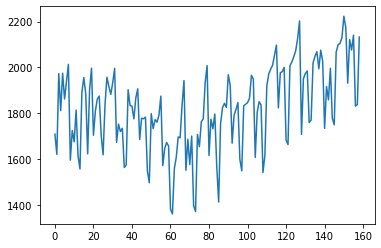

In [61]:

plt.plot(amtrak.Ridership)

In [63]:
# Converting the month data for creating the datetime object 
amtrak["Date"] = pd.to_datetime(amtrak.Month,format="%d/%m/%Y")
amtrak.head()

,Month,Ridership,month_num,Date
0,01/01/1991,1708.917,1,1991-01-01
1,01/02/1991,1620.586,2,1991-02-01
2,01/03/1991,1972.715,3,1991-03-01
3,01/04/1991,1811.665,4,1991-04-01
4,01/05/1991,1974.964,5,1991-05-01


In [64]:
amtrak.info() # TO Show the information about amtrak data file and its datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      159 non-null    object        
 1   Ridership  159 non-null    float64       
 2   month_num  159 non-null    int32         
 3   Date       159 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 4.5+ KB


In [66]:
amtrak.columns # TO SHOW THE COLUMNS OF THE DATAFILE(AMTRAK)

Index(['Month', 'Ridership', 'month_num', 'Date'], dtype='object')

In [80]:

amtrak.drop["Month", inplace=True, axis = 1]

SyntaxError: invalid syntax (<ipython-input-80-f71ca058936c>, line 1)

In [147]:
# Extracting the month and year from the datatime object
amtrak["month"]= amtrak.Date.dt.strftime("%b")
amtrak["year"]= amtrak.Date.dt.strftime("%b - %y")

In [148]:
amtrak.head()

,Ridership,month_num,Date,month,year
year,,,,,
Jan - 91,1708.917,1,1991-01-01,Jan,Jan - 91
Feb - 91,1620.586,2,1991-02-01,Feb,Feb - 91
Mar - 91,1972.715,3,1991-03-01,Mar,Mar - 91
Apr - 91,1811.665,4,1991-04-01,Apr,Apr - 91
May - 91,1974.964,5,1991-05-01,May,May - 91


In [85]:
# Creating the array of numpy to work on the simple linear regression ( converts the array into single column)
X = np.array(amtrak['month_num']).reshape(-1, 1)
y = np.array(amtrak['Ridership']).reshape(-1, 1)

In [86]:
# Splitting the data into test and train 
train_x = X[0:144]
train_y = y[0:144]

In [88]:
train_x.shape

(144, 1)

In [89]:
train_y.shape

(144, 1)

In [90]:
test_x = X[144:159]
test_y = y[144:159]

In [91]:
test_x.shape

(15, 1)

In [92]:
test_y.shape

(15, 1)

In [93]:
# Creating the linear regression model
from sklearn.linear_model import LinearRegression as LR

In [94]:
## MODEL TUNNING
LR_forcast = LR()

In [95]:
## FItting the model
LR_forcast.fit(train_x,train_y)

LinearRegression()

In [96]:
## Predicting the model
pred_y = LR_forcast.predict(test_x)

In [97]:
### find the accuracy of the model
LR_forcast.score(test_x,test_y)


-0.7112091176333939

In [99]:
# to see the coefficients of  a model
LR_forcast.coef_


array([[1.22573208]])

In [107]:
## predict the forcasting 
predict = LR_forcast.predict(test_x)
predict = np.round(predict,decimals= 2)
print('prediction for forcasting', predict)

prediction for forcasting [[1889.79]
 [1891.01]
 [1892.24]
 [1893.46]
 [1894.69]
 [1895.92]
 [1897.14]
 [1898.37]
 [1899.59]
 [1900.82]
 [1902.04]
 [1903.27]
 [1904.5 ]
 [1905.72]
 [1906.95]]


In [109]:
# Creating the forcast for the next three months
forcast_x = np.array([160,161,162]).reshape(-1, 1)
print('next three months forcast is',forcast_x)

next three months forcast is [[160]
 [161]
 [162]]


In [110]:
#forcast_x


array([[160],
       [161],
       [162]])

In [112]:
# Forcast of the month of APR, May , Jun 2004
forcast_y = LR_forcast.predict(forcast_x)
print('next three months forcast is', forcast_y)

next three months forcast is [[1908.1724665 ]
 [1909.39819857]
 [1910.62393065]]


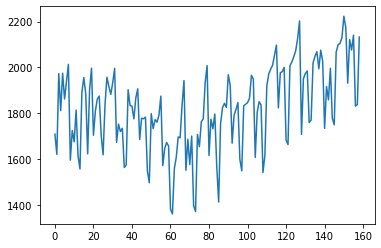

In [118]:
plt.plot(amtrak.Ridership)



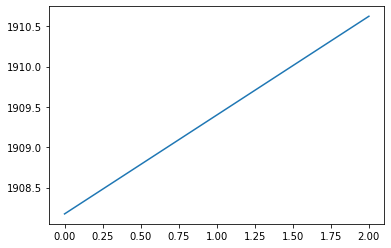

In [119]:
plt.plot(forcast_y)

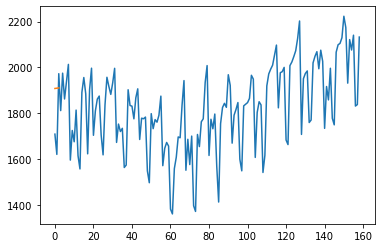

In [120]:

plt.plot(amtrak.Ridership)
plt.plot(forcast_y)


In [121]:
amtrak.set_index("year",inplace = True)

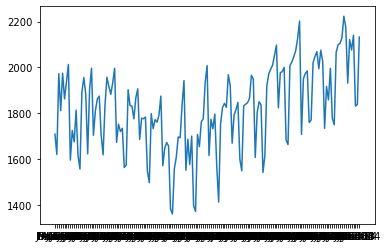

In [149]:
plt.plot(amtrak.Ridership)

In [150]:
amtrak.head()


,Ridership,month_num,Date,month,year
year,,,,,
Jan - 91,1708.917,1,1991-01-01,Jan,Jan - 91
Feb - 91,1620.586,2,1991-02-01,Feb,Feb - 91
Mar - 91,1972.715,3,1991-03-01,Mar,Mar - 91
Apr - 91,1811.665,4,1991-04-01,Apr,Apr - 91
May - 91,1974.964,5,1991-05-01,May,May - 91


In [152]:
amtrak.tail()

,Ridership,month_num,Date,month,year
year,,,,,
Nov - 03,2076.054,155,2003-11-01,Nov,Nov - 03
Dec - 03,2140.677,156,2003-12-01,Dec,Dec - 03
Jan - 04,1831.508,157,2004-01-01,Jan,Jan - 04
Feb - 04,1838.006,158,2004-02-01,Feb,Feb - 04
Mar - 04,2132.446,159,2004-03-01,Mar,Mar - 04


In [153]:
# monthly wise creating dummy variables
pd.get_dummies(amtrak['month'])


,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
Jan - 91,0,0,0,0,1,0,0,0,0,0,0,0
Feb - 91,0,0,0,1,0,0,0,0,0,0,0,0
Mar - 91,0,0,0,0,0,0,0,1,0,0,0,0
Apr - 91,1,0,0,0,0,0,0,0,0,0,0,0
May - 91,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Nov - 03,0,0,0,0,0,0,0,0,0,1,0,0
Dec - 03,0,0,1,0,0,0,0,0,0,0,0,0
Jan - 04,0,0,0,0,1,0,0,0,0,0,0,0


In [154]:
# creating a dataframe using dummy varibale
dummmy = pd.DataFrame(pd.get_dummies(amtrak['month']))


In [155]:
amtrak.tail()

,Ridership,month_num,Date,month,year
year,,,,,
Nov - 03,2076.054,155,2003-11-01,Nov,Nov - 03
Dec - 03,2140.677,156,2003-12-01,Dec,Dec - 03
Jan - 04,1831.508,157,2004-01-01,Jan,Jan - 04
Feb - 04,1838.006,158,2004-02-01,Feb,Feb - 04
Mar - 04,2132.446,159,2004-03-01,Mar,Mar - 04


In [156]:
amtrak = pd.concat([amtrak,dummmy], axis =1)

In [157]:
amtrak.reset_index(inplace = True,drop = True)

In [158]:
amtrak.head()

,Ridership,month_num,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1708.917,1,1991-01-01,Jan,Jan - 91,0,0,0,0,1,0,0,0,0,0,0,0
1,1620.586,2,1991-02-01,Feb,Feb - 91,0,0,0,1,0,0,0,0,0,0,0,0
2,1972.715,3,1991-03-01,Mar,Mar - 91,0,0,0,0,0,0,0,1,0,0,0,0
3,1811.665,4,1991-04-01,Apr,Apr - 91,1,0,0,0,0,0,0,0,0,0,0,0
4,1974.964,5,1991-05-01,May,May - 91,0,0,0,0,0,0,0,0,1,0,0,0


In [159]:
# drop the columns Date, month, year
amtrak_1 = amtrak.drop(["Date","month", "year"],axis = 1)


In [161]:
amtrak_1.head()

,Ridership,month_num,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1708.917,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1620.586,2,0,0,0,1,0,0,0,0,0,0,0,0
2,1972.715,3,0,0,0,0,0,0,0,1,0,0,0,0
3,1811.665,4,1,0,0,0,0,0,0,0,0,0,0,0
4,1974.964,5,0,0,0,0,0,0,0,0,1,0,0,0


In [162]:
amtrak_1.shape

(159, 14)

In [163]:
## to the list of columns of amtrak_1
amtrak_1.columns


Index(['Ridership', 'month_num', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [165]:
## splitting the data file into train data 
train_x = amtrak_1.iloc[0:144,1:15]
train_y = amtrak_1.iloc[0:144,0]

In [167]:
## spling the data file into test data
test_x = amtrak_1.iloc[144:159,1:15]
test_y = amtrak_1.iloc[144:159,0]

In [168]:
## seasonal componet 
## model tuneing 
LR_ses = LR()

In [169]:
### fitting the model
LR_ses.fit(train_x,train_y)

LinearRegression()

In [170]:
## accuracy of the model 
LR_ses.score(test_x,test_y)

-0.22489182020059073

In [172]:
## predict the model
pred_y = LR_ses.predict(test_x)
print( 'prediction of the LR_ses model', pred_y)

prediction of the LR_ses model [1678.16667614 1639.7278428  1938.89400947 1943.95900947 1975.1993428
 1933.8480928  2038.30325947 2083.3493428  1750.3218428  1889.83017614
 1879.99250947 1924.13592614 1691.81638272 1653.37754939 1952.54371605]


In [174]:
## forcasting the model
forcast_x = pd.DataFrame(forcast_x)
forcast_x

,0
0,160
1,161
2,162


In [177]:
forcast_x["month"] = ["Apr","May", "Jun"]
forcast_x

,0,month
0,160,Apr
1,161,May
2,162,Jun


In [181]:
forcast_x.columns = ["mon_num", "month"]
print('forcasting the columns is',forcast_x.columns)

forcasting the columns is Index(['mon_num', 'month'], dtype='object')


In [182]:
dummy = pd.get_dummies(forcast_x["month"])

In [191]:
print( 'dummy vaible will be added to the forcast',  '\n', dummy)

dummy vaible will be added to the forcast 
    Apr  Jun  May
0    1    0    0
1    0    0    1
2    0    1    0


In [192]:
forcast_x = pd.concat([forcast_x["mon_num"],dummy], axis = 1)

In [193]:
forcast_x ## after concat the mon_num and months with dummy variables

,mon_num,Apr,Jun,May
0,160,1,0,0
1,161,0,0,1
2,162,0,1,0


In [196]:
###RMSE - Root mean square error for with seasonality
from sklearn import metrics
metrics.mean_squared_error(test_y,pred_y, squared = False)

166.88184796847236

In [198]:
#MSE for LR model
metrics.mean_squared_error(test_y,predict, squared = False)

197.247052024781

In [235]:
# Using MAPE error metrics to check for the error rate and accuracy level

#Defining MAPE function
def MAPE(test_y,Predict):
    temp=np.abs(test_y - Predict)/100
    return np.mean(temp)

In [199]:
#### TIMESERIES MODELS ####
###If your data does not have trend or seasonal component - You choose the following Time series Analays
# 1.Moving Average
# 2.Single Exponential Smoothing 
### If Your data have a trend but do not have a seasonal component - You choose following Time Series
# 3.Trend Analysis 
# 4. Double Expontiel Smoothing
###IF your data have seasinol component with or without trend - You can Choose 
# 5. Decomposition 
# 6. Holt's winter Method
# ARIMA (Auto Regressive Integrated Moving Average ) - You choose this all scenrio